# IMPORT DATA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bpideep.getdata import getfulldata
import pandas as pd
import ast

In [3]:
data = pd.read_csv('../bpideep/rawdata/complete_df.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,about,achievements,alexa_rank_chart,angellist_url,app_12_months_growth_percentile,app_12_months_growth_relative,app_12_months_growth_unique,app_3_months_growth_percentile,...,traffic,traffic_summary,twitter_favorites_chart,twitter_followers_chart,twitter_tweets_chart,twitter_url,url,website_url,deep_or_not,target
0,0,0,NaN,[],[],NaN,NaN,NaN,NaN,NaN,...,"{'visitors': '47', 'annual_growth': -70.987654...",0.1K,[],[],[],https://twitter.com/health_cardio,https://app.dealroom.co/companies/healthcardio...,http://healthcardionexion.com,deeptech,1
1,1,1,NaN,[],[],NaN,NaN,NaN,NaN,NaN,...,"{'visitors': '659', 'annual_growth': None, 'so...",0.7K,[],[],[],https://twitter.com/4p_pharma,https://app.dealroom.co/companies/4p_pharma,http://4p-pharma.com,deeptech,1
2,2,2,NaN,[],[],NaN,NaN,NaN,NaN,NaN,...,"{'visitors': '359', 'annual_growth': None, 'so...",0.4K,[],[],[],https://twitter.com/afyrenbiotech,https://app.dealroom.co/companies/afyren,http://afyren.com/,deeptech,1
3,3,3,NaN,[],"[{'date': '2017-02-08', 'value': 25266187}, {'...",NaN,NaN,NaN,NaN,NaN,...,"{'visitors': '1668', 'annual_growth': None, 's...",2K,[],[],[],https://twitter.com/abbelight,https://app.dealroom.co/companies/abbelight,http://www.abbelight.com,deeptech,1
4,4,4,NaN,[],[],NaN,NaN,NaN,NaN,NaN,...,"{'visitors': '371', 'annual_growth': 6.9164265...",0.4K,[],[],[],https://twitter.com/ablacare,https://app.dealroom.co/companies/ablacare,https://ablacare.com,deeptech,1


In [4]:
data['name'].head()

0    Healthcardionexion.com
1                 4P Pharma
2                    AFYREN
3                 Abbelight
4                  AblaCare
Name: name, dtype: object

In [5]:
data.shape

(832, 96)

# DATA CLEANING

## BACKGROUND_TEAM

In [ ]:
def background(x) :
        backgrounds_list = []
        team = ast.literal_eval(x)
        for y in range(len(team['items'])):
                backgrounds= team['items'][y]['backgrounds']
                for u in range(len(backgrounds)):
                    backgrounds_list.append(backgrounds[u]['name'])                                
        return backgrounds_list
data['background_team'] = data['team'].map(lambda x:background(x))

## DEGREE_TEAM

In [6]:
def degree(x) :
        degree_list = []
        team = ast.literal_eval(x)
        for y in range(len(team['items'])):
                universities= team['items'][y]['universities']['items']
                if universities and universities[0]['degree'] is not None :
                    degree = universities[0]['degree']['name']
                    degree_list.append(degree)
        return degree_list
data['degree_team'] = data['team'].map(lambda x:degree(x))

In [7]:
def degree_quant(x): 
    if len(x) == 0: 
        return 0
    else :
        for n in range(len(x)):
            if x[n] in ['Doctor','PhD'] : 
                return 1
            else : 
                return 0
data['doctor'] = data['degree_team'].map(lambda x: degree_quant(x))

## FUNDING_EMPLOYEES_RATIO

In [8]:
def funding_amounts_employees(data): 
    funding = data['total_funding_source']
    employees = data['employees_latest']
    return funding/employees
data['funding_employees_ratio'] = funding_amounts_employees(data)

## STRONG AND SUPER FOUNDER

In [9]:
data['has_strong_founder'] = data['has_strong_founder'].map({True : 1, 
                                                                False : 0})
data['has_super_founder'] = data['has_strong_founder'].map({True : 1, 
                                                               False : 0})


## GROWTH_STAGE_NUM

In [10]:
data['growth_stage'].unique()

array(['seed', 'late growth', 'early growth', nan, 'mature'], dtype=object)

In [11]:
def growth_stage_num(data):
    stage_status = data['growth_stage'].map({'mature' : 4, 
                                            'late growth' : 3,
                                            'early growth' : 2,
                                            'seed' : 1})
    return stage_status
data['growth_stage_num'] = growth_stage_num(data)

## FACEBOOK/TWITTER/ALEXA

In [ ]:
def facebook_like_company_status(data): #pas assez de facebook pour appliquer // voir si il y a plus de facebook dans les non/deeptech
    likes_chart = data['facebook_likes_chart']
    last_likes = likes_chart[-1]['value']
    num_stage = data['growth_stage_num']
    return last_likes/num_stage
df['facebook_like_company_stage_ratio'] = facebook_like_company_stage(data)
data[['facebook_likes_chart','twitter_followers_chart','alexa_rank_chart']]

In [ ]:
def twitter_followers_company_status(data):#pas assez de twitter pour appliquer
    followers_chart = data['twitter_followers_chart']
    last_followers = followers_chart[-1]['value']
    num_status = df['company_status_num']
    return last_followers/num_status
df['twitter_followers_company_status_ratio'] = twitter_followers_company_status(df)

In [ ]:
def alexa_rank_company_status(data):#pas assez de alexa rank pour appliquer
    alexa_chart = data['alexa_rank_chart']
    last_rank = alexa_chart[-1]['value']
    num_status = data['company_status'].apply({'operationnal' : 5, 
                                              'fezfzefezfze' : 4})
    return last_rank/num_status
df['alexa_rank_company_status_ratio'] = alexa_rank_company_status(df)

## TRAFFIC VISITORS

In [ ]:
def traffic_visitors(x): 
    traffic = ast.literal_eval(x)
    traffic = traffic['visitors']
    return traffic 
data['traffic_visitors'] = data['traffic'].map(lambda x : traffic_visitors(x))

## INDUSTRIES

In [ ]:
def industries(x): 
    industries = ast.literal_eval(x)
    if industries : 
        industries = industries[0]['name']
        return industries
data['industrie_name'] = data['industries'].map(lambda x : industries(x))

In [ ]:
data[['industrie_name','about']].groupby('industrie_name')['about'].nunique()
data['industrie_name'].isnull().sum()

## new data with selected features

In [12]:
data_feat = data[['name', 'doctor', 'funding_employees_ratio', 'has_super_founder', 'has_strong_founder', 'growth_stage_num', 'target']]

In [13]:
data_feat.shape

(832, 7)

In [14]:
data_feat.head()

,name,doctor,funding_employees_ratio,has_super_founder,has_strong_founder,growth_stage_num,target
0,Healthcardionexion.com,0,0.000000e+00,0,0,1.0,1
1,4P Pharma,0,NaN,0,0,3.0,1
2,AFYREN,1,7.777778e+05,0,0,2.0,1
3,Abbelight,1,1.833333e+05,0,0,2.0,1
4,AblaCare,0,2.000000e+06,0,0,1.0,1


## ENCODED TAGS (NEW_DF)

### LIST OF ALL TAGS

In [15]:
def list_of_tags(data):
    tags_list = []
    tags_data = data['tags']
    for x in range(len(tags_data)) : 
        tags = ast.literal_eval(tags_data[x])
        for y in range(len(tags)) : 
            if tags[y] not in tags_list :
                tags_list.append(tags[y])
    return tags_list
list_of_tags = list_of_tags(data)

### ENCODING 

In [16]:
def encoder(data) :
    new_df = pd.DataFrame(columns= list_of_tags)
    for u in range(len(data)):
        data_tags = data['tags'][u]
        dict_ = {}
        for n in list_of_tags :
            company_tags = ast.literal_eval(data_tags)
            if n in company_tags : 
                encoder = 1
            else : 
                encoder = 0
            dict_[n] = encoder
        new_df.loc[u] = dict_
    return new_df
encoded_df = encoder(data)

In [17]:
encoded_df.head()

,investing,risk management,biotechnology,sustainable development goals,core sustainable impact,biomass,agritech,alternative protein,7 - affordable and clean energy,13 - climate action,...,office space,breeding,cloud data services,survey,adherent french tech one,fish,server,wildlife,prototype,herbal medicine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
encoded_df.columns.tolist()

['investing',
 'risk management',
 'biotechnology',
 'sustainable development goals',
 'core sustainable impact',
 'biomass',
 'agritech',
 'alternative protein',
 '7 - affordable and clean energy',
 '13 - climate action',
 'imaging technology',
 'eic',
 'nanoscopy',
 'microscopy',
 '3 - good health and well-being',
 'non-invasive',
 'health care',
 'medical device',
 'femtech',
 'vivatech2019',
 'medical / healthcare',
 'touchscreen',
 'human computer interaction',
 'gesture recognition',
 'platform',
 'arts & culture',
 'search engine',
 'printing',
 '6 - clean water and sanitation',
 'testing',
 'polymer',
 'repair',
 'medical',
 'chemistry',
 'health diagnostics',
 'life science',
 'neuroscience',
 'power',
 'radio',
 'network',
 'lte',
 '4g',
 'banking',
 'streaming',
 'communication',
 'monitoring',
 'sharing economy',
 'community',
 'mapping',
 'navigation',
 'video',
 'drones',
 'packaging and containers',
 'system engineering',
 'telecommunications',
 'space tech',
 'electroni

pbm de chiffres dans des tags : ex '7 - affordable and clean energy'  
--> à voir comment arranger avec regex

## PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components = 4)

In [21]:
pca.fit(encoded_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca_array = pca.transform(encoded_df)

In [23]:
pca_df = pd.DataFrame(pca_array)

In [24]:
pca_df.head()

,0,1,2,3
0,-0.167935,-0.117651,-0.126410,-0.133844
1,-0.087102,-0.074572,0.020629,-0.045296
2,1.753061,-0.629246,0.331763,-0.271748
3,0.737278,-0.565939,0.701916,-0.042925
4,-0.101678,-0.217588,0.012853,-0.018862


### PCA interpretation

In [ ]:
pca_var = pca_df.std() ** 2 / ((pca_df.std() ** 2).sum())

In [ ]:
pca_var.sort_values(ascending = False)

In [ ]:
pca.explained_variance_ratio_

import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% explained variance')
plt.xlim((0, 20))

In [ ]:
Wt = pd.DataFrame(pca.components_)
Wt

In [ ]:
Wt.iloc[0].sort_values(ascending = False)

In [ ]:
encoded_df.columns.tolist()[3]

In [ ]:
encoded_df.columns.tolist()[4]

In [ ]:
encoded_df.columns.tolist()[8]

In [ ]:
encoded_df.columns.tolist()[9]

## other feature 

## dataset merging

In [25]:
base_df = pd.concat([data_feat, pca_df], axis = 1)

In [26]:
base_df.head()

,name,doctor,funding_employees_ratio,has_super_founder,has_strong_founder,growth_stage_num,target,0,1,2,3
0,Healthcardionexion.com,0,0.000000e+00,0,0,1.0,1,-0.167935,-0.117651,-0.126410,-0.133844
1,4P Pharma,0,NaN,0,0,3.0,1,-0.087102,-0.074572,0.020629,-0.045296
2,AFYREN,1,7.777778e+05,0,0,2.0,1,1.753061,-0.629246,0.331763,-0.271748
3,Abbelight,1,1.833333e+05,0,0,2.0,1,0.737278,-0.565939,0.701916,-0.042925
4,AblaCare,0,2.000000e+06,0,0,1.0,1,-0.101678,-0.217588,0.012853,-0.018862


In [27]:
base_df.shape

(832, 11)

In [28]:
base_df.columns

Index([                   'name',                  'doctor',
       'funding_employees_ratio',       'has_super_founder',
            'has_strong_founder',        'growth_stage_num',
                        'target',                         0,
                               1,                         2,
                               3],
      dtype='object')

In [29]:
base_df.rename(columns = {0: 'pca_0',
                          1: 'pca_1',
                          2: 'pca_2',
                          3: 'pca_3'
                         },
               inplace = True
              )

In [30]:
base_df.head()

,name,doctor,funding_employees_ratio,has_super_founder,has_strong_founder,growth_stage_num,target,pca_0,pca_1,pca_2,pca_3
0,Healthcardionexion.com,0,0.000000e+00,0,0,1.0,1,-0.167935,-0.117651,-0.126410,-0.133844
1,4P Pharma,0,NaN,0,0,3.0,1,-0.087102,-0.074572,0.020629,-0.045296
2,AFYREN,1,7.777778e+05,0,0,2.0,1,1.753061,-0.629246,0.331763,-0.271748
3,Abbelight,1,1.833333e+05,0,0,2.0,1,0.737278,-0.565939,0.701916,-0.042925
4,AblaCare,0,2.000000e+06,0,0,1.0,1,-0.101678,-0.217588,0.012853,-0.018862


In [31]:
import seaborn as sns

<AxesSubplot:>

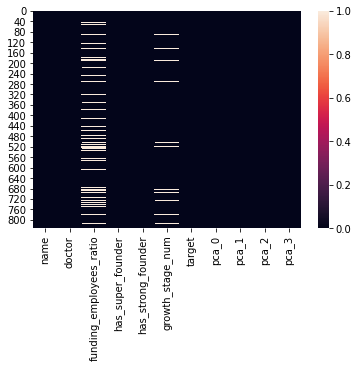

In [32]:
sns.heatmap(base_df.isnull())

In [33]:
base_df.isnull().sum()

name                         0
doctor                       0
funding_employees_ratio    145
has_super_founder            0
has_strong_founder           0
growth_stage_num            45
target                       0
pca_0                        0
pca_1                        0
pca_2                        0
pca_3                        0
dtype: int64

#### imputing median value in 'funding employee ratio'

In [34]:
base_df.loc[base_df['funding_employees_ratio'].isnull(), 'funding_employees_ratio'] = base_df['funding_employees_ratio'].median()

In [35]:
base_df.isnull().sum()

name                        0
doctor                      0
funding_employees_ratio     0
has_super_founder           0
has_strong_founder          0
growth_stage_num           45
target                      0
pca_0                       0
pca_1                       0
pca_2                       0
pca_3                       0
dtype: int64

In [36]:
base_df[base_df['growth_stage_num'].isnull()]

,name,doctor,funding_employees_ratio,has_super_founder,has_strong_founder,growth_stage_num,target,pca_0,pca_1,pca_2,pca_3
26,Algosource,0,38994.8,0,0,NaN,1,-0.167935,-0.117651,-0.126410,-0.133844
28,Alphanosos,0,38994.8,0,0,NaN,1,-0.041137,-0.422138,0.743030,0.119187
30,Altevax,0,38994.8,0,0,NaN,1,-0.167935,-0.117651,-0.126410,-0.133844
34,Anagenesis,0,38994.8,0,0,NaN,1,-0.167935,-0.117651,-0.126410,-0.133844
41,APCure,0,38994.8,0,0,NaN,1,-0.167935,-0.117651,-0.126410,-0.133844
61,BIOMILLENIA,1,38994.8,1,1,NaN,1,-0.060630,0.509039,0.107953,-0.192184
92,Cintoo,0,38994.8,0,0,NaN,1,-0.167935,-0.117651,-0.126410,-0.133844
99,CorWave SA,0,38994.8,0,0,NaN,1,-0.167935,-0.117651,-0.126410,-0.133844
118,DeltaBlock,0,38994.8,0,0,NaN,1,-0.176802,-0.118342,-0.136390,-0.126907
146,Embodme,0,38994.8,0,0,NaN,1,-0.055727,-0.057149,-0.393907,0.721331


for the baseline model, we just drop those lines, but we'll need to impute values manually later on

In [38]:
base_df.dropna(inplace = True)

In [39]:
base_df.to_csv('base_df.csv')